In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest


mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/dfIavg_A_Hourly.csv')
df.head()

,Time,Iavg_A
0,2021-01-02 19:00:00,16.496783
1,2021-01-02 20:00:00,16.152183
2,2021-01-02 21:00:00,17.377550
3,2021-01-02 22:00:00,16.347800
4,2021-01-02 23:00:00,16.287483


In [4]:
df['Iavg_A'].fillna(df.Iavg_A.mean(), inplace=True)

In [5]:
df['Time'] = pd.to_datetime(df['Time'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    20401 non-null  datetime64[ns]
 1   Iavg_A  20401 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 318.9 KB


,Time,Iavg_A
0,2021-01-02 19:00:00,16.496783
1,2021-01-02 20:00:00,16.152183
2,2021-01-02 21:00:00,17.377550
3,2021-01-02 22:00:00,16.347800
4,2021-01-02 23:00:00,16.287483


In [6]:
dfi = df.set_index('Time')
df

,Time,Iavg_A
0,2021-01-02 19:00:00,16.496783
1,2021-01-02 20:00:00,16.152183
2,2021-01-02 21:00:00,17.377550
3,2021-01-02 22:00:00,16.347800
4,2021-01-02 23:00:00,16.287483
...,...,...
20396,2023-05-02 15:00:00,47.339167
20397,2023-05-02 16:00:00,45.313900
20398,2023-05-02 17:00:00,25.722350
20399,2023-05-02 18:00:00,17.685133


In [7]:
fig = px.line(dfi.reset_index(), x ='Time', y='Iavg_A', title='Iavg_A')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [8]:
df['hour'] = df.Time.dt.hour

In [9]:
 df['weekday']=pd.Categorical(df.Time.dt.strftime('%A'), categories=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'
 ])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     20401 non-null  datetime64[ns]
 1   Iavg_A   20401 non-null  float64       
 2   hour     20401 non-null  int64         
 3   weekday  17473 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 498.4 KB


<Axes: xlabel='hour'>

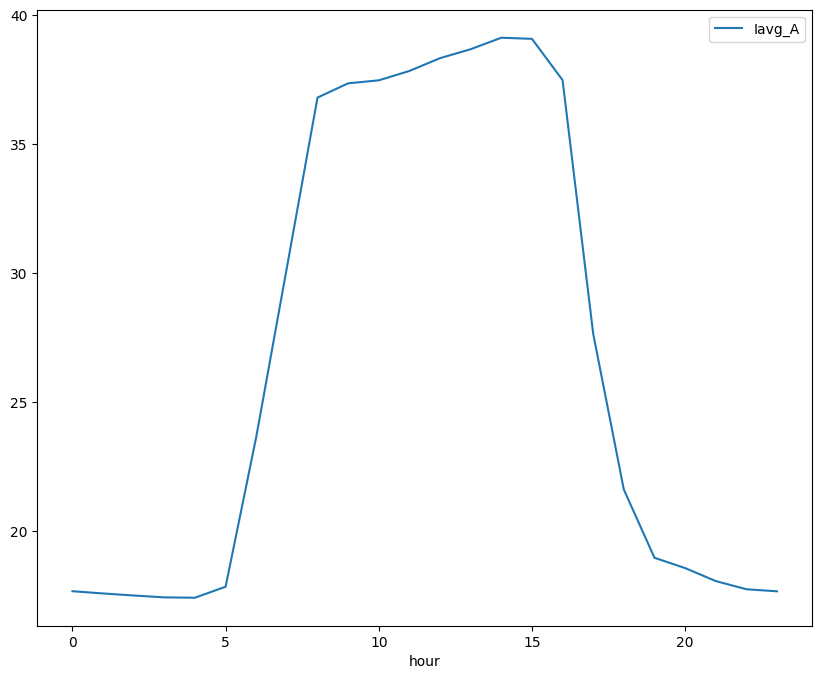

In [11]:
df[['Iavg_A','hour']].groupby('hour').mean().plot()

<Axes: xlabel='weekday'>

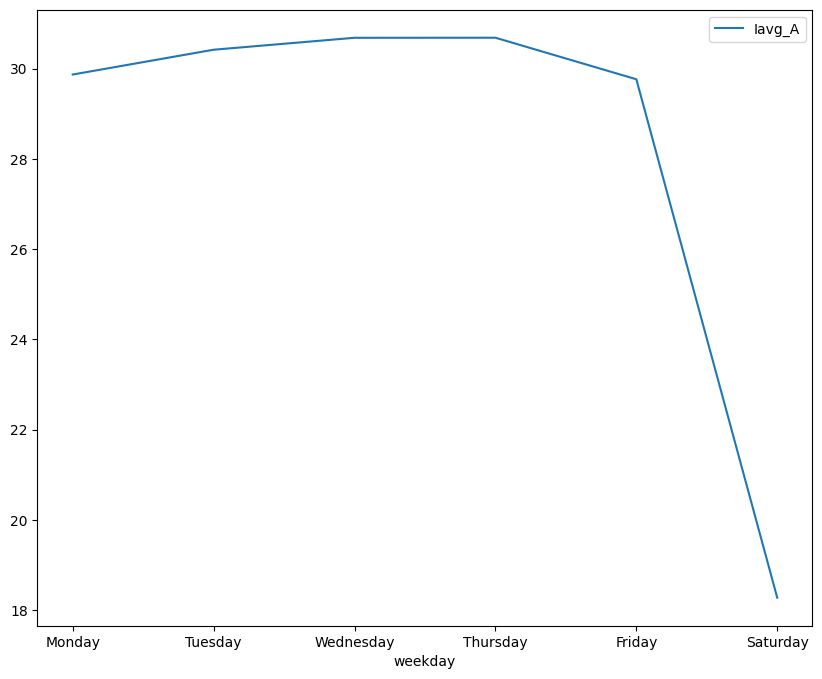

In [12]:
df[['Iavg_A','weekday']].groupby('weekday').mean().plot()


<Axes: xlabel='hour'>

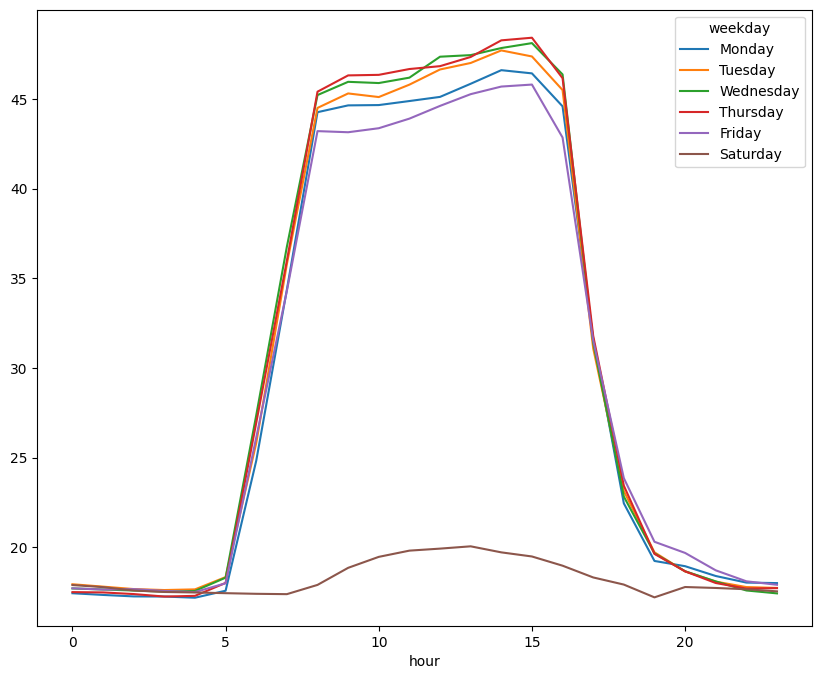

In [13]:
df.groupby(['hour','weekday']).mean()['Iavg_A'].unstack().plot()

In [14]:
df.join(df.groupby(['hour','weekday'])['Iavg_A'].mean(), on=['hour','weekday'], rsuffix='_avg')

,Time,Iavg_A,hour,weekday,Iavg_A_avg
0,2021-01-02 19:00:00,16.496783,19,Saturday,17.199812
1,2021-01-02 20:00:00,16.152183,20,Saturday,17.776988
2,2021-01-02 21:00:00,17.377550,21,Saturday,17.723371
3,2021-01-02 22:00:00,16.347800,22,Saturday,17.652542
4,2021-01-02 23:00:00,16.287483,23,Saturday,17.535112
...,...,...,...,...,...
20396,2023-05-02 15:00:00,47.339167,15,Tuesday,47.369821
20397,2023-05-02 16:00:00,45.313900,16,Tuesday,45.497002
20398,2023-05-02 17:00:00,25.722350,17,Tuesday,31.089716
20399,2023-05-02 18:00:00,17.685133,18,Tuesday,23.128513


In [15]:
df_final = df.join(df.groupby(['hour','weekday'])['Iavg_A'].mean(), on=['hour','weekday'], rsuffix='_avg')

In [16]:
df_final['day']=df.Time.dt.weekday

In [17]:
df_final

,Time,Iavg_A,hour,weekday,Iavg_A_avg,day
0,2021-01-02 19:00:00,16.496783,19,Saturday,17.199812,5
1,2021-01-02 20:00:00,16.152183,20,Saturday,17.776988,5
2,2021-01-02 21:00:00,17.377550,21,Saturday,17.723371,5
3,2021-01-02 22:00:00,16.347800,22,Saturday,17.652542,5
4,2021-01-02 23:00:00,16.287483,23,Saturday,17.535112,5
...,...,...,...,...,...,...
20396,2023-05-02 15:00:00,47.339167,15,Tuesday,47.369821,1
20397,2023-05-02 16:00:00,45.313900,16,Tuesday,45.497002,1
20398,2023-05-02 17:00:00,25.722350,17,Tuesday,31.089716,1
20399,2023-05-02 18:00:00,17.685133,18,Tuesday,23.128513,1


In [18]:
data = df_final[['Iavg_A', 'hour','day']]

In [19]:
# data['Iavg_A'].fillna(data.Iavg_A.mean(), inplace = True)

In [20]:
model = IsolationForest(contamination=0.005, max_features=3, max_samples=0.8, n_estimators=200)

In [21]:
model.fit(data)

IsolationForest(contamination=0.005, max_features=3, max_samples=0.8,
                n_estimators=200)

In [22]:
df_final['outliers'] = pd.Series(model.predict(data)).apply(lambda x:'yes' if (x== -1) else 'no')

In [23]:
df_final.query('outliers=="yes"')

,Time,Iavg_A,hour,weekday,Iavg_A_avg,day,outliers
100,2021-01-06 23:00:00,7.553417,23,Wednesday,17.421700,2,yes
101,2021-01-07 00:00:00,7.054733,0,Thursday,17.492524,3,yes
571,2021-01-26 14:00:00,73.265833,14,Tuesday,47.707105,1,yes
712,2021-02-01 11:00:00,72.353917,11,Monday,44.883628,0,yes
715,2021-02-01 14:00:00,74.030433,14,Monday,46.605247,0,yes
...,...,...,...,...,...,...,...
19482,2023-03-25 13:00:00,44.708067,13,Saturday,20.046762,5,yes
19501,2023-03-26 08:00:00,23.915150,8,NaN,NaN,6,yes
19502,2023-03-26 09:00:00,22.800233,9,NaN,NaN,6,yes
20068,2023-04-18 23:00:00,25.784183,23,Tuesday,17.725190,1,yes


In [24]:
fig = px.scatter(df_final.reset_index(), x ='Time', y='Iavg_A',color='outliers', hover_data=['weekday','hour','Iavg_A_avg'], title='Iavg_A')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [25]:
score = model.decision_function(data)

In [26]:
score

array([0.17600361, 0.16295385, 0.14132079, ..., 0.13994326, 0.13986451,
       0.16101842])

(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 8.000e+00, 1.100e+01,
        1.000e+01, 1.600e+01, 1.800e+01, 2.900e+01, 3.500e+01, 3.700e+01,
        2.600e+01, 6.000e+01, 4.900e+01, 7.300e+01, 9.500e+01, 9.800e+01,
        1.360e+02, 1.820e+02, 2.970e+02, 3.600e+02, 3.460e+02, 5.530e+02,
        7.650e+02, 9.430e+02, 9.730e+02, 1.158e+03, 1.366e+03, 1.743e+03,
        1.863e+03, 1.901e+03, 1.583e+03, 1.428e+03, 1.586e+03, 1.328e+03,
        9.680e+02, 3.280e+02]),
 array([-0.13694174, -0.13051204, -0.12408233, -0.11765262, -0.11122291,
        -0.1047932 , -0.09836349, -0.09193379, -0.08550408, -0.07907437,
        -0.07264466, -0.06621495, -0.05978524, -0.05335554, -0.04692583,
        -0.04049612, -0.03406641, -0.0276367 , -0.021207  , -0.01477729,
        -0.00834758, -0.00191787,  0.00451184,  0.01094155,  0.01737125,
         0.

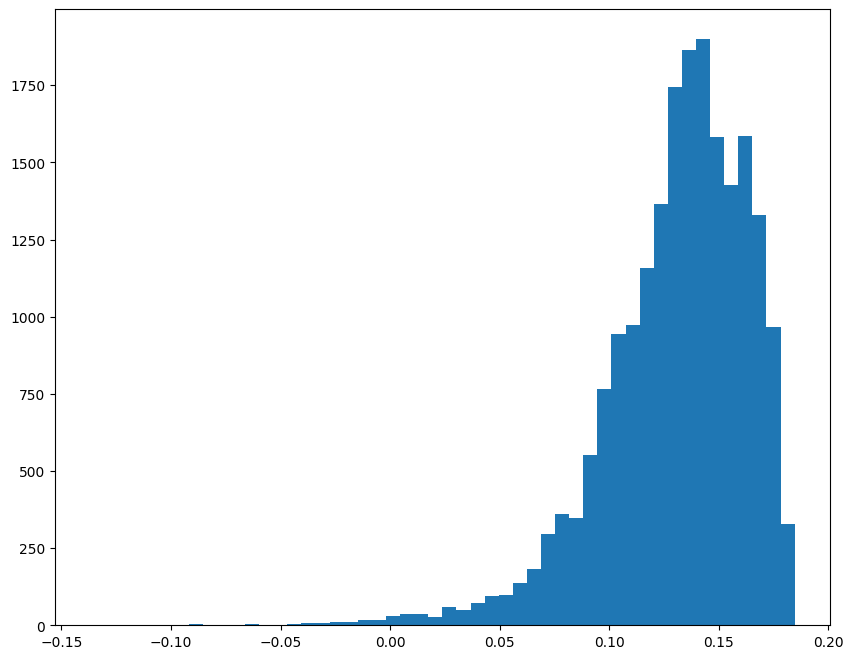

In [27]:
plt.hist(score,bins=50)

In [28]:
df_final['scores'] = score

In [29]:
df_final

,Time,Iavg_A,hour,weekday,Iavg_A_avg,day,outliers,scores
0,2021-01-02 19:00:00,16.496783,19,Saturday,17.199812,5,no,0.176004
1,2021-01-02 20:00:00,16.152183,20,Saturday,17.776988,5,no,0.162954
2,2021-01-02 21:00:00,17.377550,21,Saturday,17.723371,5,no,0.141321
3,2021-01-02 22:00:00,16.347800,22,Saturday,17.652542,5,no,0.149979
4,2021-01-02 23:00:00,16.287483,23,Saturday,17.535112,5,no,0.130790
...,...,...,...,...,...,...,...,...
20396,2023-05-02 15:00:00,47.339167,15,Tuesday,47.369821,1,no,0.135655
20397,2023-05-02 16:00:00,45.313900,16,Tuesday,45.497002,1,no,0.121966
20398,2023-05-02 17:00:00,25.722350,17,Tuesday,31.089716,1,no,0.139943
20399,2023-05-02 18:00:00,17.685133,18,Tuesday,23.128513,1,no,0.139865


In [30]:
df_final.query('scores<-0.06')

,Time,Iavg_A,hour,weekday,Iavg_A_avg,day,outliers,scores
100,2021-01-06 23:00:00,7.553417,23,Wednesday,17.421700,2,yes,-0.069291
101,2021-01-07 00:00:00,7.054733,0,Thursday,17.492524,3,yes,-0.090339
1550,2021-03-08 09:00:00,76.171450,9,Monday,44.641263,0,yes,-0.071395
1551,2021-03-08 10:00:00,82.456917,10,Monday,44.658622,0,yes,-0.112889
1556,2021-03-08 15:00:00,78.520833,15,Monday,46.426343,0,yes,-0.076815
1557,2021-03-08 16:00:00,75.076950,16,Monday,44.588054,0,yes,-0.063983
2261,2021-04-07 00:00:00,8.297650,0,Wednesday,17.697641,2,yes,-0.061105
6772,2021-10-11 23:00:00,1.029633,23,Monday,17.995737,0,yes,-0.136942
6773,2021-10-12 00:00:00,0.269217,0,Tuesday,17.931018,1,yes,-0.127120
6774,2021-10-12 01:00:00,0.000000,1,Tuesday,17.797967,1,yes,-0.101459


In [31]:
df_final['outliers2'] = np.where(df_final['scores'] < -0.06, 'yes', 'no')

In [33]:
df_final

,Time,Iavg_A,hour,weekday,Iavg_A_avg,day,outliers,scores,outliers2
0,2021-01-02 19:00:00,16.496783,19,Saturday,17.199812,5,no,0.176004,no
1,2021-01-02 20:00:00,16.152183,20,Saturday,17.776988,5,no,0.162954,no
2,2021-01-02 21:00:00,17.377550,21,Saturday,17.723371,5,no,0.141321,no
3,2021-01-02 22:00:00,16.347800,22,Saturday,17.652542,5,no,0.149979,no
4,2021-01-02 23:00:00,16.287483,23,Saturday,17.535112,5,no,0.130790,no
...,...,...,...,...,...,...,...,...,...
20396,2023-05-02 15:00:00,47.339167,15,Tuesday,47.369821,1,no,0.135655,no
20397,2023-05-02 16:00:00,45.313900,16,Tuesday,45.497002,1,no,0.121966,no
20398,2023-05-02 17:00:00,25.722350,17,Tuesday,31.089716,1,no,0.139943,no
20399,2023-05-02 18:00:00,17.685133,18,Tuesday,23.128513,1,no,0.139865,no


In [34]:
fig = px.scatter(df_final.reset_index(), x ='Time', y='Iavg_A',color='outliers2', hover_data=['weekday','hour','Iavg_A_avg'], title='Iavg_A')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()
